# Problem Statement

We will be trying to understand sentiment of tweets about the company Apple, By using the twitter for better understand public perception, Apple wants to monitor how people feel over time and how people receive new announcements.

Our challenge is to see if we can correctly classify tweets as being negative, positive, or neither about Apple.

Sentiment Mining - Apple
•	Apple is a computer company known for its laptops, phones, tablets, and personal media players
•	Large numbers of fans, large number of “haters”
•	Apple wants to monitor how people feel about them over time, and how people receive new announcements.

Problem Statement:
•	Can we correctly classify tweets as being negative, positive, or neither about Apple?



In [11]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

Load the csv file available in the working or specified directory

In [12]:
#import os
#os.chdir('C:\\GL Class\DSBA - Python\Machine Learning\Week 3')
Apple_tweets = pd.read_csv("Apple_tweets.csv")

In [13]:
Apple_tweets.head()

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8


## Basic Exploration in Text Mining

### Number of words

**To create a temporary function lambda can be used. These functions do not require a name like a def function, however the output is same as defining a permanent function**
**As these function are temporary, memory comsumption is less in comparison to permanent function. Also there are multiple ways to get a similar output**


In [14]:
## Let's get a word count without writing a lambda function

Apple_tweets['totalwords'] = [len(x.split()) for x in Apple_tweets['Tweet'].tolist()]
Apple_tweets[['Tweet','totalwords']].head()

,Tweet,totalwords
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",11
4,.@apple has the best customer service. In and ...,16


In [15]:
Apple_tweets['word_count'] = Apple_tweets['Tweet'].apply(lambda x: len(str(x).split(" ")))
Apple_tweets[['Tweet','word_count']].head()

,Tweet,word_count
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",12
4,.@apple has the best customer service. In and ...,16


### Number of Characters- including spaces

In [16]:
Apple_tweets['char_count'] = Apple_tweets['Tweet'].str.len() ## this also includes spaces
Apple_tweets[['Tweet','char_count']].head()

,Tweet,char_count
0,"I have to say, Apple has by far the best custo...",101
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,60
2,LOVE U @APPLE,13
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",91
4,.@apple has the best customer service. In and ...,82


### Average Word Length

In [17]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

Apple_tweets['avg_word'] = Apple_tweets['Tweet'].apply(lambda x: avg_word(x))
Apple_tweets[['Tweet','avg_word']].head()

,Tweet,avg_word
0,"I have to say, Apple has by far the best custo...",4.368421
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,5.100000
2,LOVE U @APPLE,3.666667
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",7.272727
4,.@apple has the best customer service. In and ...,4.187500


In [18]:
#!pip install nltk

In [19]:
#import nltk
#nltk.download('stopwords')

### Number of stop Words

In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

Apple_tweets['stopwords'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
Apple_tweets[['Tweet','stopwords']].head()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\v2n/nltk_data'
    - 'C:\\Users\\v2n\\AppData\\Local\\Continuum\\anaconda3\\nltk_data'
    - 'C:\\Users\\v2n\\AppData\\Local\\Continuum\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\v2n\\AppData\\Local\\Continuum\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\v2n\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


### Number of special character

In [21]:
Apple_tweets['hastags'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
Apple_tweets[['Tweet','hastags']].head()

,Tweet,hastags
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,0


In [22]:
Apple_tweets['hastags_1'] = Apple_tweets['Tweet'].apply(lambda tweet: len([token for token in tweet.split() if token.startswith('#')]))
Apple_tweets[['Tweet','hastags_1']].head()

,Tweet,hastags_1
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,0


### Number of numerics

In [23]:
Apple_tweets['numerics'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
Apple_tweets[['Tweet','numerics']].head()

,Tweet,numerics
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",0
4,.@apple has the best customer service. In and ...,0


### Number of Uppercase Words

In [24]:
Apple_tweets['upper'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
Apple_tweets[['Tweet','upper']].head()

,Tweet,upper
0,"I have to say, Apple has by far the best custo...",2
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,0
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1
4,.@apple has the best customer service. In and ...,0


## Basic Pre-Processing

### Lower Case conversion

In [25]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Apple_tweets['Tweet'].head()

0    i have to say, apple has by far the best custo...
1    ios 7 is so fricking smooth & beautiful!! #tha...
2                                        love u @apple
3    thank you @apple, loving my new iphone 5s!!!!!...
4    .@apple has the best customer service. in and ...
Name: Tweet, dtype: object

### Removal of Punctuation

In [26]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].str.replace('[^\w\s]','')
Apple_tweets['Tweet'].head()

0    i have to say apple has by far the best custom...
1    ios 7 is so fricking smooth  beautiful thanxap...
2                                         love u apple
3    thank you apple loving my new iphone 5s apple ...
4    apple has the best customer service in and out...
Name: Tweet, dtype: object

### Removal of StopWords

In [27]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Apple_tweets['Tweet'].head()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\v2n/nltk_data'
    - 'C:\\Users\\v2n\\AppData\\Local\\Continuum\\anaconda3\\nltk_data'
    - 'C:\\Users\\v2n\\AppData\\Local\\Continuum\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\v2n\\AppData\\Local\\Continuum\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\v2n\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


### Common Words Removal
1. **We will create a list of 10 frequently occuring words and then decide if we need to remove it or retain it.**
2. **Reason is that this file has tweets related to Apple.. So no point in keeping the word like Apple, unless we have tweets from other brands**

In [28]:
freq = pd.Series(' '.join(Apple_tweets['Tweet']).split()).value_counts()[:20]
freq

apple     1297
the        489
to         326
iphone     257
i          251
a          238
is         209
you        187
and        183
for        145
in         143
my         142
of         137
it         137
new        113
on         107
with       104
that        92
5s          91
ipad        88
dtype: int64

In [29]:
freq =['apple','get']

1. **As we are talking about multiple products hence iphone will be kept, similarly some tweets do relate to old products without mentioning the word old, hence even new would be kept in the tweets.**
2. **hence only apple and get would be removed**

In [30]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Apple_tweets['Tweet'].head()

0    i have to say has by far the best customer car...
1     ios 7 is so fricking smooth beautiful thanxapple
2                                               love u
3    thank you loving my new iphone 5s iphone5s pic...
4    has the best customer service in and out with ...
Name: Tweet, dtype: object

### Rare Words Removal
**This is done as association of these less occurring words with the existing words could be a noise**

In [31]:
freq = pd.Series(' '.join(Apple_tweets['Tweet']).split()).value_counts()[-10:]
freq
## As it is difficult to make out if these words will have association in text analytics or not, 
## hence to start with these words are kept in the dataset

glam              1
takentooz         1
outchea           1
hella             1
compre            1
sues              1
eligible          1
racebaiting       1
brenberryblast    1
purchases         1
dtype: int64

### Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [32]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
Apple_tweets['Tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))



0    i have to say ha by far the best custom care s...
1             io 7 is so frick smooth beauti thanxappl
2                                               love u
3    thank you love my new iphon 5s iphone5 pictwit...
4    ha the best custom servic in and out with a ne...
Name: Tweet, dtype: object

In [33]:
def Tweet(x):
    if x >= 0:
        return "Positive"
    else: return "Negative"


### Now to get the sentiments as positive and negative , convert the Avg column . If value is >= 0  then tweet is Positive, else tweet is Negative. This will make a dependent variable as a binary classifier

In [41]:
Apple_tweets["Sentiment"] = Apple_tweets["Avg"].apply(Tweet)

Apple_tweets.head()


,Tweet,Avg,totalwords,word_count,char_count,avg_word,hastags,hastags_1,numerics,upper,Sentiment
0,i have to say has by far the best customer car...,2.0,19,19,101,4.368421,0,0,0,2,Positive
1,ios 7 is so fricking smooth beautiful thanxapple,2.0,10,10,60,5.100000,1,1,1,0,Positive
2,love u,1.8,3,3,13,3.666667,0,0,0,3,Positive
3,thank you loving my new iphone 5s iphone5s pic...,1.8,11,12,91,7.272727,2,2,0,1,Positive
4,has the best customer service in and out with ...,1.8,16,16,82,4.187500,0,0,0,0,Positive


In [35]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tweet       1181 non-null   object 
 1   Avg         1181 non-null   float64
 2   totalwords  1181 non-null   int64  
 3   word_count  1181 non-null   int64  
 4   char_count  1181 non-null   int64  
 5   avg_word    1181 non-null   float64
 6   hastags     1181 non-null   int64  
 7   hastags_1   1181 non-null   int64  
 8   numerics    1181 non-null   int64  
 9   upper       1181 non-null   int64  
 10  Sentiment   1181 non-null   object 
dtypes: float64(2), int64(7), object(2)
memory usage: 101.6+ KB


## Let's look at distribution of different sentiments

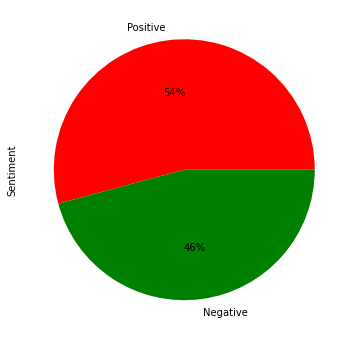

In [36]:
plt.figure(figsize=(8,6))
Apple_tweets.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red","green"])
plt.show()

In [37]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tweet       1181 non-null   object 
 1   Avg         1181 non-null   float64
 2   totalwords  1181 non-null   int64  
 3   word_count  1181 non-null   int64  
 4   char_count  1181 non-null   int64  
 5   avg_word    1181 non-null   float64
 6   hastags     1181 non-null   int64  
 7   hastags_1   1181 non-null   int64  
 8   numerics    1181 non-null   int64  
 9   upper       1181 non-null   int64  
 10  Sentiment   1181 non-null   object 
dtypes: float64(2), int64(7), object(2)
memory usage: 101.6+ KB


In [38]:
processed_features = Apple_tweets.iloc[:, 0].values
labels = Apple_tweets.iloc[:, 10].values

In [28]:
processed_features

array(['say far best customer care service ever received appstore',
       'ios 7 fricking smooth beautiful thanxapple', 'love u', ...,
       'freaking cows freak', 'hate phone working im going freak',
       'agounalakis thats nasty nasty brat'], dtype=object)

In [29]:
labels

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

## TfidfVectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [31]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.8, max_features=2500,
                min_df=7, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

## Train-Test split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [33]:
y_train

array(['Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negati

## Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=200, random_state=0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**Performance Matrix on train data set**

In [35]:
from sklearn import metrics
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9449152542372882
[[380  45]
 [  7 512]]
              precision    recall  f1-score   support

    Negative       0.98      0.89      0.94       425
    Positive       0.92      0.99      0.95       519

    accuracy                           0.94       944
   macro avg       0.95      0.94      0.94       944
weighted avg       0.95      0.94      0.94       944



**Performance Matrix on test data set**

In [36]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7130801687763713
[[75 41]
 [27 94]]
              precision    recall  f1-score   support

    Negative       0.74      0.65      0.69       116
    Positive       0.70      0.78      0.73       121

    accuracy                           0.71       237
   macro avg       0.72      0.71      0.71       237
weighted avg       0.72      0.71      0.71       237



## Decision Tree Model

In [37]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier(random_state=1)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

**Performance Matrix on train data set**

In [38]:
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9449152542372882
[[386  39]
 [ 13 506]]
              precision    recall  f1-score   support

    Negative       0.97      0.91      0.94       425
    Positive       0.93      0.97      0.95       519

    accuracy                           0.94       944
   macro avg       0.95      0.94      0.94       944
weighted avg       0.95      0.94      0.94       944



**Performance Matrix on test data set**

In [39]:
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6751054852320675
[[76 40]
 [37 84]]
              precision    recall  f1-score   support

    Negative       0.67      0.66      0.66       116
    Positive       0.68      0.69      0.69       121

    accuracy                           0.68       237
   macro avg       0.67      0.67      0.67       237
weighted avg       0.68      0.68      0.67       237



## Discriminant Analysis

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

**Performance Matrix on train data set**

In [41]:
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.809322033898305
[[303 122]
 [ 58 461]]
              precision    recall  f1-score   support

    Negative       0.84      0.71      0.77       425
    Positive       0.79      0.89      0.84       519

    accuracy                           0.81       944
   macro avg       0.82      0.80      0.80       944
weighted avg       0.81      0.81      0.81       944



**Performance Matrix on test data set**

In [42]:
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.70042194092827
[[76 40]
 [31 90]]
              precision    recall  f1-score   support

    Negative       0.71      0.66      0.68       116
    Positive       0.69      0.74      0.72       121

    accuracy                           0.70       237
   macro avg       0.70      0.70      0.70       237
weighted avg       0.70      0.70      0.70       237



In [43]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7182203389830508
[[215 210]
 [ 56 463]]
              precision    recall  f1-score   support

    Negative       0.79      0.51      0.62       425
    Positive       0.69      0.89      0.78       519

    accuracy                           0.72       944
   macro avg       0.74      0.70      0.70       944
weighted avg       0.74      0.72      0.71       944



In [45]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6075949367088608
[[49 67]
 [26 95]]
              precision    recall  f1-score   support

    Negative       0.65      0.42      0.51       116
    Positive       0.59      0.79      0.67       121

    accuracy                           0.61       237
   macro avg       0.62      0.60      0.59       237
weighted avg       0.62      0.61      0.59       237



## Conclusion

Out of the 4 models given above, considering the different between train and test dataset performance parameters, LDA has performed the best. As per the norm difference between the test and train matrix performance parameters can be within +/- 10% for the model to be valid. For a Negative class, for LDA, difference is within the norms. However for Positive class it is bit higher.


We can also look at KNN model outout as well wherein difference between train and test is within +/- 10% but the recall value for Negative sentiments is quite low.

In terms of sentiments, based on the organization objective, both positive and  negative metrics could be analyzed to define the marketing strategy e.g. based on positive sentiments organization can decide on what needs to be done for a specific product to increase the positive sentiment. Similarly based on the negative keywords organisation can decide what needs to be corrected to decrease the negative sentiment.







**Pl. note - Model building is an iterative process. Model performance both on the test and train dataset can be improved using feature engineering, feature extraction, hyper parameter tuning (including combination of various parameters).** 

**Model has to match the business objective and hence various permutation and combinations can be tried on to refine the model**